# Visualizing PRES16_WTA

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (17,4)
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14

import bokeh.charts
from bokeh.plotting import figure, output_notebook, show
from bokeh.charts import TimeSeries
bokeh.charts.defaults.width = 950
bokeh.charts.defaults.height = 400
output_notebook(hide_banner=True)

from viz import plot_interactive_timeseries

In [2]:
pres16_wta = pd.read_csv("../data/PRES16_WTA.csv", parse_dates=['Date'], thousands=",", infer_datetime_format=True)
pres16_wta.rename(columns={'$Volume': 'Volume'}, inplace=True)

# Fix Data Issue on 2015-01-26 (duplicate data)
assert len(pres16_wta[(pres16_wta.Date == "2015-01-26") & (pres16_wta.Contract == "DEM16_WTA")]) == 2
assert len(pres16_wta[(pres16_wta.Date == "2015-01-26") & (pres16_wta.Contract == "REP16_WTA")]) == 2

print("Number of Rows before deduplicating", len(pres16_wta))
pres16_wta.drop_duplicates(keep='first', inplace=True)
print("Number of Rows after deduplicating", len(pres16_wta))

pres16_wta.head()

Number of Rows before deduplicating 1036
Number of Rows after deduplicating 1034


,Date,Contract,Units,Volume,LowPrice,HighPrice,AvgPrice,LastPrice
0,2014-11-17,DEM16_WTA,0,0.0,0.0,0.0,NaN,0.0
1,2014-11-17,REP16_WTA,0,0.0,0.0,0.0,NaN,0.0
2,2014-11-18,DEM16_WTA,0,0.0,0.0,0.0,NaN,0.0
3,2014-11-18,REP16_WTA,0,0.0,0.0,0.0,NaN,0.0
4,2014-11-19,DEM16_WTA,0,0.0,0.0,0.0,NaN,0.0


In [3]:
p = plot_interactive_timeseries(pres16_wta, 'LastPrice')
show(p)

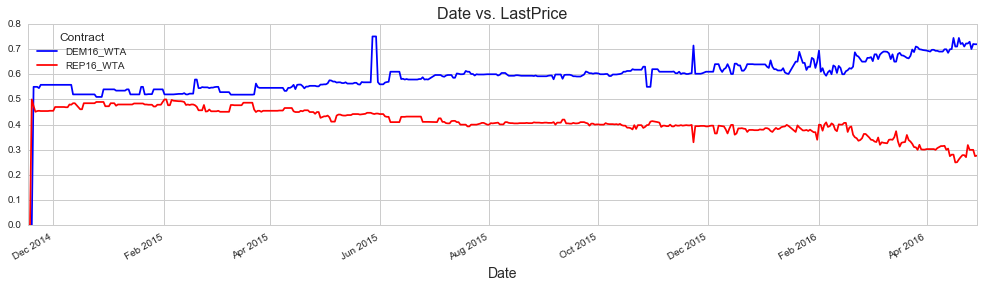

In [4]:
pres16_wta.pivot(index='Date', columns='Contract', values='LastPrice').sort_index(axis=1).plot(
    color=['blue', 'red'], title="Date vs. LastPrice")

In [5]:
p = plot_interactive_timeseries(pres16_wta, 'Units')
show(p)

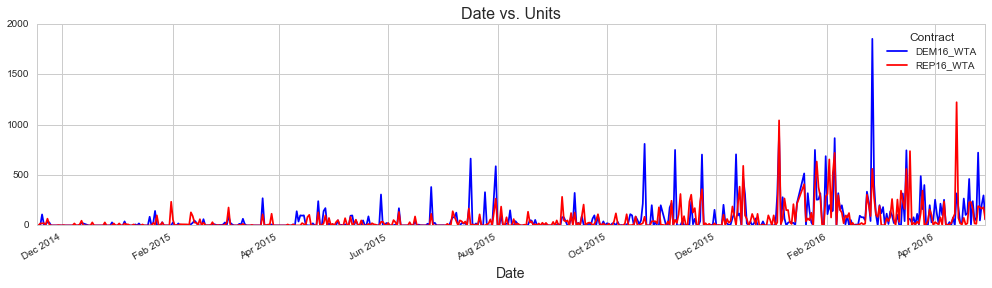

In [6]:
pres16_wta.pivot(index='Date', columns='Contract', values='Units').sort_index(axis=1).plot(
    color=['blue', 'red'], title="Date vs. Units")

In [7]:
p = plot_interactive_timeseries(pres16_wta, 'Volume')
show(p)

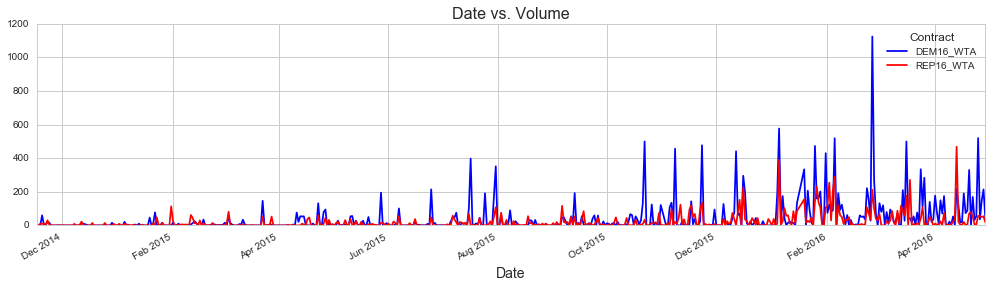

In [8]:
pres16_wta.pivot(index='Date', columns='Contract', values='Volume').sort_index(axis=1).plot(
    color=['blue', 'red'], title="Date vs. Volume")